In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers, regularizers
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.layers.recurrent import LSTM
import pandas as pd
import os
print(os.listdir("../input/gtzandataset/gtzanspectogramdata/img_data/"))

Using TensorFlow backend.


['classical', 'reggae', 'country', 'rock', 'pop', 'disco', 'jazz', 'blues', 'metal', 'hiphop']


In [2]:
data_dir = "../input/gtzandataset/gtzanspectogramdata/img_data/"

In [3]:
RESOLUTION = 132
BATCH_SIZE = 20

#Carregando Dataset de treino
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

#Carregando Dataset de Validação
val_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
val_generator = val_datagen.flow_from_directory(
        data_dir,
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [4]:
model = Sequential()

#convolutional layers
#filters used, size features extrator, img dimension
model.add(Conv2D(32, (3,3), input_shape=(132, 132, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

#hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 130, 130, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 65, 65, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 135200)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               34611456  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total para

In [6]:
N_TRAIN = 800
N_VAL = 200
history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=50,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE)
)

Epoch 1/50
40/40 [==============================] - 20s 502ms/step - loss: 2.4046 - acc: 0.1088 - val_loss: 2.2995 - val_acc: 0.1800
Epoch 2/50
40/40 [==============================] - 16s 398ms/step - loss: 2.2164 - acc: 0.1813 - val_loss: 2.2285 - val_acc: 0.1550
Epoch 3/50
40/40 [==============================] - 16s 400ms/step - loss: 2.0970 - acc: 0.2325 - val_loss: 2.1710 - val_acc: 0.2250
Epoch 4/50
40/40 [==============================] - 16s 399ms/step - loss: 2.0297 - acc: 0.2500 - val_loss: 2.1409 - val_acc: 0.2800
Epoch 5/50
40/40 [==============================] - 16s 397ms/step - loss: 1.9624 - acc: 0.2913 - val_loss: 2.2158 - val_acc: 0.2150
Epoch 6/50
40/40 [==============================] - 16s 399ms/step - loss: 1.9097 - acc: 0.3050 - val_loss: 2.1511 - val_acc: 0.1600
Epoch 7/50
40/40 [==============================] - 16s 398ms/step - loss: 1.8269 - acc: 0.3175 - val_loss: 1.9555 - val_acc: 0.3200
Epoch 8/50
40/40 [==============================] - 16s 396ms/step - 

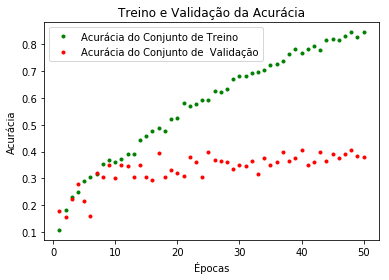

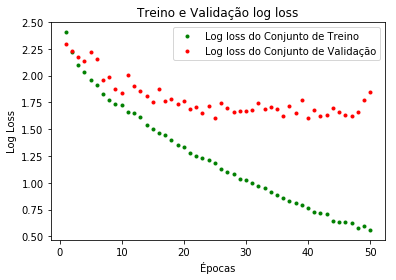

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g.', label='Acurácia do Conjunto de Treino')
plt.plot(epochs, val_acc, 'r.', label='Acurácia do Conjunto de  Validação')
plt.title('Treino e Validação da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'g.', label='Log loss do Conjunto de Treino')
plt.plot(epochs, val_loss, 'r.', label='Log loss do Conjunto de Validação')
plt.title('Treino e Validação log loss')
plt.xlabel('Épocas')
plt.ylabel('Log Loss')
plt.legend(loc='best')

In [8]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [9]:
model = Sequential()
##Convlutional
model.add(Conv2D(32, (3,3), input_shape=(132, 132, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

In [10]:
N_TRAIN = 800
N_VAL = 200
history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=50,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE)
)

Epoch 1/50
40/40 [==============================] - 17s 419ms/step - loss: 2.8326 - acc: 0.1338 - val_loss: 2.1643 - val_acc: 0.2400
Epoch 2/50
40/40 [==============================] - 15s 384ms/step - loss: 2.3220 - acc: 0.1825 - val_loss: 2.0640 - val_acc: 0.1700
Epoch 3/50
40/40 [==============================] - 15s 387ms/step - loss: 2.2687 - acc: 0.1663 - val_loss: 2.1087 - val_acc: 0.2550
Epoch 4/50
40/40 [==============================] - 15s 383ms/step - loss: 2.1576 - acc: 0.2088 - val_loss: 2.1007 - val_acc: 0.2400
Epoch 5/50
40/40 [==============================] - 15s 384ms/step - loss: 2.1232 - acc: 0.2113 - val_loss: 2.0925 - val_acc: 0.3250
Epoch 6/50
40/40 [==============================] - 15s 384ms/step - loss: 2.0955 - acc: 0.2175 - val_loss: 2.0313 - val_acc: 0.2750
Epoch 7/50
40/40 [==============================] - 15s 386ms/step - loss: 2.0513 - acc: 0.2338 - val_loss: 1.9444 - val_acc: 0.3150
Epoch 8/50
40/40 [==============================] - 15s 386ms/step - 

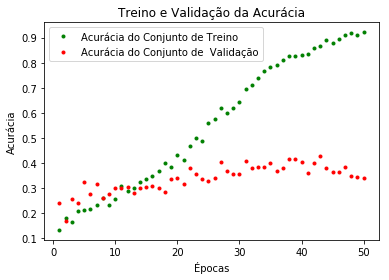

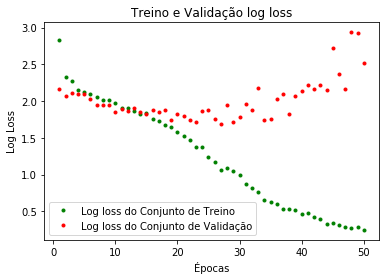

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g.', label='Acurácia do Conjunto de Treino')
plt.plot(epochs, val_acc, 'r.', label='Acurácia do Conjunto de  Validação')
plt.title('Treino e Validação da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'g.', label='Log loss do Conjunto de Treino')
plt.plot(epochs, val_loss, 'r.', label='Log loss do Conjunto de Validação')
plt.title('Treino e Validação log loss')
plt.xlabel('Épocas')
plt.ylabel('Log Loss')
plt.legend(loc='best')

In [12]:
weights_vgg16 = "../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [13]:
conv_base_vgg16 = VGG16(include_top=False, input_shape=(132, 132, 3), weights=weights_vgg16)

model = Sequential()
model.add(conv_base_vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

In [14]:
N_TRAIN = 800
N_VAL = 200
history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=50,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE)
)

Epoch 1/50
40/40 [==============================] - 18s 443ms/step - loss: 2.2908 - acc: 0.1338 - val_loss: 2.1075 - val_acc: 0.2450
Epoch 2/50
40/40 [==============================] - 16s 391ms/step - loss: 1.9713 - acc: 0.2575 - val_loss: 2.2877 - val_acc: 0.1300
Epoch 3/50
40/40 [==============================] - 16s 396ms/step - loss: 1.7792 - acc: 0.3463 - val_loss: 1.8335 - val_acc: 0.3550
Epoch 4/50
40/40 [==============================] - 16s 399ms/step - loss: 1.5659 - acc: 0.4225 - val_loss: 1.8501 - val_acc: 0.3200
Epoch 5/50
40/40 [==============================] - 16s 395ms/step - loss: 1.5079 - acc: 0.4350 - val_loss: 1.6990 - val_acc: 0.4100
Epoch 6/50
40/40 [==============================] - 16s 396ms/step - loss: 1.3287 - acc: 0.5000 - val_loss: 1.5326 - val_acc: 0.4300
Epoch 7/50
40/40 [==============================] - 16s 394ms/step - loss: 1.2881 - acc: 0.5137 - val_loss: 1.5069 - val_acc: 0.4450
Epoch 8/50
40/40 [==============================] - 16s 393ms/step - 

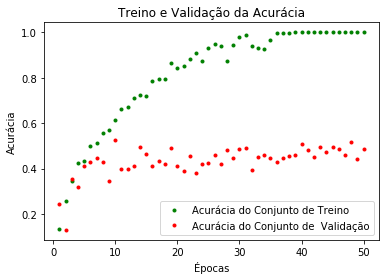

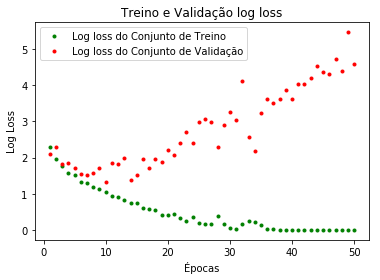

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g.', label='Acurácia do Conjunto de Treino')
plt.plot(epochs, val_acc, 'r.', label='Acurácia do Conjunto de  Validação')
plt.title('Treino e Validação da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'g.', label='Log loss do Conjunto de Treino')
plt.plot(epochs, val_loss, 'r.', label='Log loss do Conjunto de Validação')
plt.title('Treino e Validação log loss')
plt.xlabel('Épocas')
plt.ylabel('Log Loss')
plt.legend(loc='best')